In this example we will show how to model a conditional dosing using the `DiscreteCallbacks`. The problem is as follows. The patient has a drug `A(t)` in their system. The concentration of the drug is given as `C(t)=A(t)/V` for some volume constant `V`. At `t=4`, the patient goes to the clinic and is checked. If the concentration of the drug in their body is below `4`, then they will receive a new dose.

For our model, we will use the simple decay equation. We will write this in the in-place form to make it easy to extend to more complicated examples:
# Conditional Dosing Pharmacometric Example
### Chris Rackauckas

In [2]:
using DifferentialEquations
function f(du,u,p,t)
    du[1] = -u[1]
end
u0 = [10.0]
const V = 1
prob = ODEProblem(f,u0,(0.0,10.0))

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [10.0]

Let's see what the solution looks like without any events.

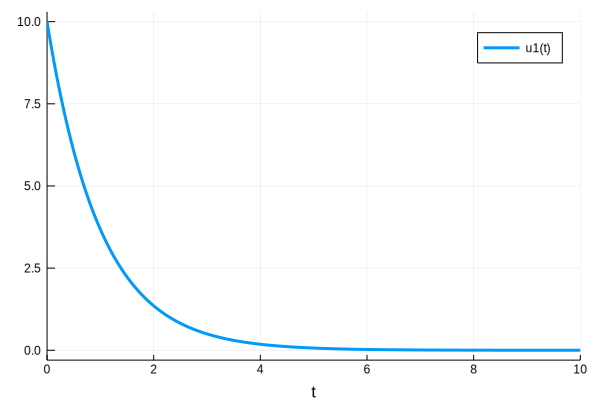

In [3]:
sol = solve(prob,Tsit5())
using Plots; gr()
plot(sol)

We see that at time `t=4`, the patient should receive a dose. Let's code up that event. We need to check at `t=4` if the concentration `u[1]/4` is `<4`, and if so, add `10` to `u[1]`. We do this with the following:

In [4]:
condition(u,t,integrator) = t==4 && u[1]/V<4
affect!(integrator) = integrator.u[1] += 10
cb = DiscreteCallback(condition,affect!)

DiscreteCallback{typeof(condition),typeof(affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT)}(condition, affect!, DiffEqBase.INITIALIZE_DEFAULT, Bool[true, true])

Now we will give this callback to the solver, and tell it to stop at `t=4` so that way the condition can be checked:

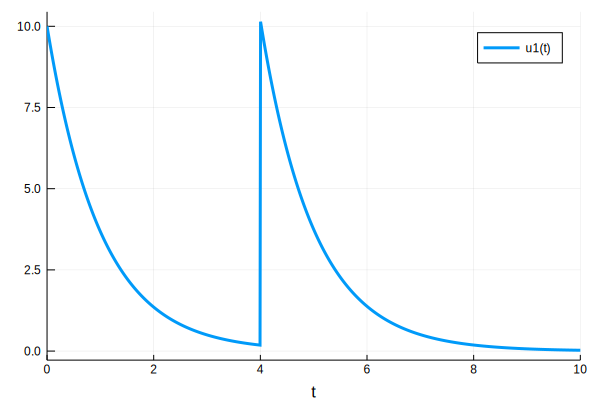

In [5]:
sol = solve(prob,Tsit5(),tstops=[4.0],callback=cb)
using Plots; gr()
plot(sol)

Let's show that it actually added 10 instead of setting the value to 10. We could have set the value using `affect!(integrator) = integrator.u[1] = 10`

In [6]:
println(sol(4.00000))
println(sol(4.000000000001))

[0.183164]
[10.1832]


Now let's model a patient whose decay rate for the drug is lower:

In [7]:
function f(du,u,p,t)
    du[1] = -u[1]/6
end
u0 = [10.0]
const V = 1
prob = ODEProblem(f,u0,(0.0,10.0))

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [10.0]

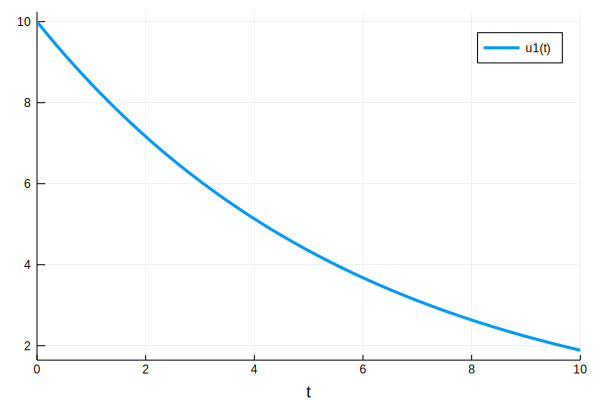

In [8]:
sol = solve(prob,Tsit5())
using Plots; gr()
plot(sol)

Under the same criteria, with the same event, this patient will not receive a second dose:

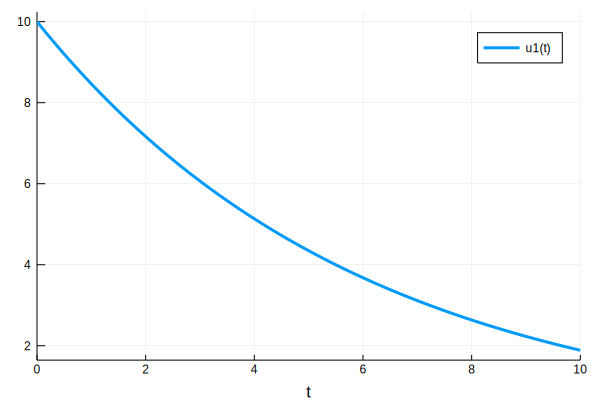

In [9]:
sol = solve(prob,Tsit5(),tstops=[4.0],callback=cb)
using Plots; gr()
plot(sol)